#Imports


In [ ]:
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from cuml.linear_model import LogisticRegression as cuLogisticRegression
import gc
import cupy as cp

#SET 1: HOG features

In [ ]:
# Load feature and label data
X_train = np.load("hog_features.npy")
y_train = np.load("labels_train.npy")
X_test  = np.load("hog_features_test.npy")
y_test  = np.load("labels_test.npy")


In [2]:
# Train a Logistic Classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [3]:
# Make predictions
y_pred = model.predict(X_test)



In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7371
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       723
           1       0.72      0.71      0.71      1203
           2       0.83      0.79      0.81      2038
           3       0.75      0.92      0.83       269

    accuracy                           0.74      4233
   macro avg       0.71      0.75      0.72      4233
weighted avg       0.74      0.74      0.74      4233



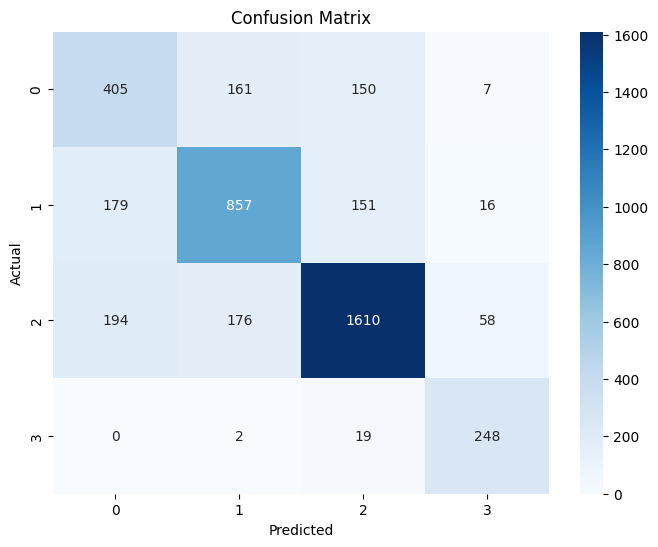

In [5]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [6]:
# Save model to existing relative path
model_path = "../models/logistic_classification_hog_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: ../models/logistic_classification_hog_model.pkl


#SET 2 :NORMALISED IMAGED WITH MASK RESIZED

In [ ]:
# Define paths

base_path = "../data"
base_path_out = os.path.join(base_path, "processed")

# Step 1: Load the train and test data from the .npz files
train_data = np.load(os.path.join(base_path_out, 'train_data_resized20_with_masks.npz'))
X_train = train_data['X_train']
y_train = train_data['y_train']

test_data = np.load(os.path.join(base_path_out, 'test_data_resized20_with_masks.npz'))
X_test = test_data['X_test']
y_test = test_data['y_test']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35059, 400)
y_train shape: (35059,)
X_test shape: (4233, 400)
y_test shape: (4233,)


In [5]:
# Step 2: Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict using the trained model
y_pred = model.predict(X_test)

c:\Users\arfin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 58.04%


In [7]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.32      0.34       723
           1       0.57      0.59      0.58      1203
           2       0.72      0.62      0.67      2038
           3       0.42      0.90      0.57       269

    accuracy                           0.58      4233
   macro avg       0.52      0.61      0.54      4233
weighted avg       0.60      0.58      0.58      4233



Confusion Matrix:


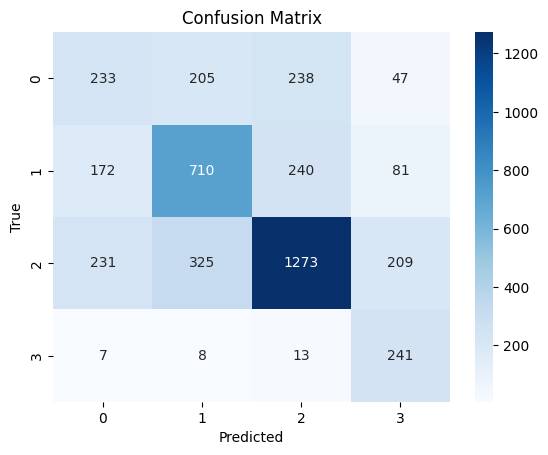

In [8]:
# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Save model to existing relative path
import joblib
model_path = "../models/logistic_classification_with_masks_size20_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: ../models/logistic_classification_with_masks_size20_model.pkl


#SET3:NORMALISED IMAGEs WITHOUT MASK-notfiltered


In [ ]:
# define paths

base_path = r"..\\data\\"
#base_path_in = os.path.join(base_path, "processed", "extracted")   # path to read from the *.npy files
base_path_in = os.path.join(base_path, "processed")   # path to read from the *.npy files

train_npy_file = 'train_data_resized20_without_masks.npz'
test_npy_file  = 'test_data_resized20_without_masks20.npz'

#train data
train = np.load(os.path.join(base_path_in, train_npy_file), allow_pickle=True)
X_train = train['X_train']
y_train = train['y_train']

# test data
test = np.load(os.path.join(base_path_in, test_npy_file), allow_pickle=True)
X_test = test['X_test']
y_test = test['y_test']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35059, 400)
y_train shape: (35059,)
X_test shape: (4233, 400)
y_test shape: (4233,)


In [ ]:
print(y_train[:5])
print(np.unique(y_train))
print(y_train.dtype)
#labels stored as string,convert the labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


[2 0 2 3 2]
[0 1 2 3]
object


In [8]:
# Step 2: Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict using the trained model
y_pred = model.predict(X_test)

c:\Users\arfin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 69.24%


In [10]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       723
           1       0.69      0.67      0.68      1203
           2       0.78      0.75      0.76      2038
           3       0.65      0.91      0.76       269

    accuracy                           0.69      4233
   macro avg       0.65      0.71      0.67      4233
weighted avg       0.70      0.69      0.69      4233



Confusion Matrix:


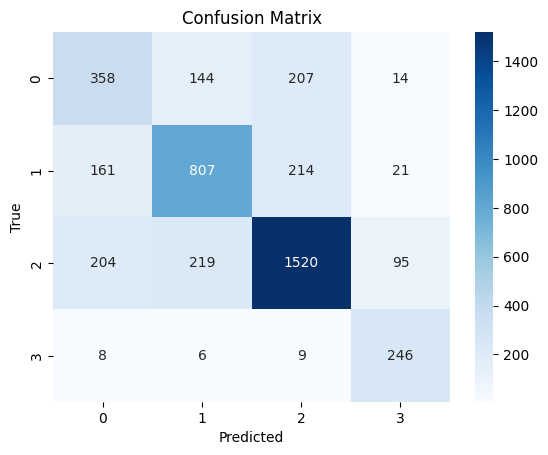

In [11]:
# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Save model to existing relative path
import joblib
model_path = "../models/logistic_classification_without_masks_nofilter_size20_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: ../models/logistic_classification_without_masks_nofilter_size20_model.pkl


#Random search + PCA


In [ ]:
#Random search +PCA
#from google.colab import drive
#drive.mount('/content/drive')
# === Path setup ===
#base_dir = "/content/drive/MyDrive/train features"
#test_dir = f"{base_dir}/test features"

# === Load data ===
X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Define pipeline with PCA ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100, random_state=42)),  # Reduce to 100 components
    ('logreg', LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1))
])

# === Randomized hyperparameter search ===
param_distributions = {
    'logreg__C': loguniform(1e-3, 1e2),
    'logreg__penalty': ['l1', 'l2']
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

# === Train ===
start_time = time.time()
search.fit(X_train, y_train)
print(f"\n⏱️ Training time: {time.time() - start_time:.2f} seconds")

# === Evaluation ===
print("Best parameters:", search.best_params_)
print("Best CV score:", search.best_score_)
print("Test set accuracy:", search.score(X_test, y_test))

y_pred = search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Save model ===
joblib.dump(search.best_estimator_, f"{base_dir}/best_logreg_pca_pipeline.pkl")


#GRID SEARCH :resied images(Fitting 2 folds for each of 2 candidates, totalling 4 fits)

X_train shape: (35059, 400)
y_train shape: (35059,)
X_test shape: (4233, 400)
y_test shape: (4233,)
Any NaN values in X_train: False
Any infinite values in X_train: False
Any NaN values in X_test: False
Any infinite values in X_test: False
Fitting 2 folds for each of 2 candidates, totalling 4 fits

⏱️ Training time: 179.50 seconds
Best parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Best CV score: 0.6833624888323764
Test set accuracy: 0.6909992912827781
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       723
           1       0.68      0.67      0.68      1203
           2       0.78      0.74      0.76      2038
           3       0.65      0.91      0.76       269

    accuracy                           0.69      4233
   macro avg       0.65      0.70      0.67      4233
weighted avg       0.69      0.69      0.69      4233



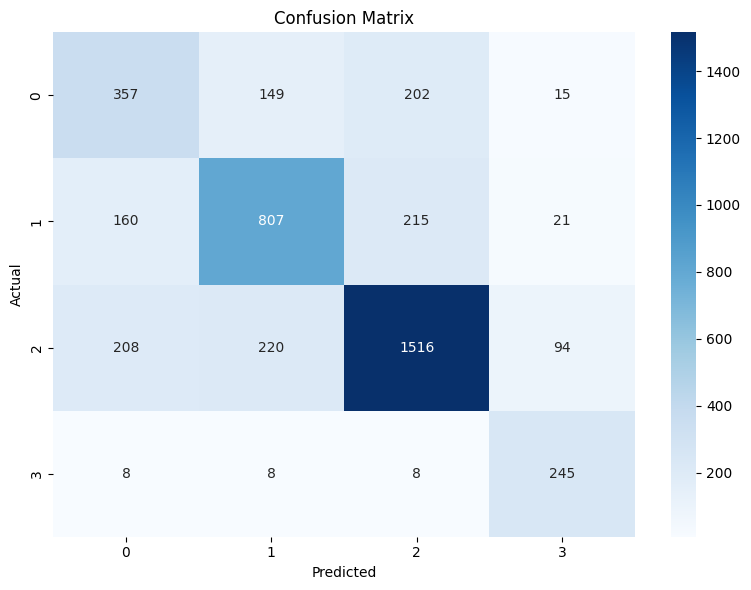

Best model saved as best_logreg_gridsearch.pkl


In [ ]:

# === Define paths ===
base_path = r"..\\data\\"
base_path_in = os.path.join(base_path, "processed")   # path to read from the *.npy files

train_npy_file = 'train_data_resized20_without_masks.npz'
test_npy_file  = 'test_data_resized20_without_masks20.npz'

# === Load Data ===
# Load train data
train = np.load(os.path.join(base_path_in, train_npy_file), allow_pickle=True)
X_train = train['X_train']
y_train = train['y_train']

# Load test data
test = np.load(os.path.join(base_path_in, test_npy_file), allow_pickle=True)
X_test = test['X_test']
y_test = test['y_test']

# Print data shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# === Check for NaN or infinite values ===
print("Any NaN values in X_train:", np.any(np.isnan(X_train)))
print("Any infinite values in X_train:", np.any(np.isinf(X_train)))
print("Any NaN values in X_test:", np.any(np.isnan(X_test)))
print("Any infinite values in X_test:", np.any(np.isinf(X_test)))

# === Convert y_train and y_test to integers if necessary ===
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# === Pipeline Definition ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logreg', LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1))  # Logistic regression
])

# === GridSearchCV Definition ===
param_grid = {
    'logreg__C': [0.1, 1],  # Use just two values for testing
    'logreg__penalty': ['l2'],  # Use only l2 penalty for simplicity
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=2,  # Use just 2-fold cross-validation for faster testing
    verbose=1,
    n_jobs=-1
)

# === Train the Model ===
start_time = time.time()
grid_search.fit(X_train, y_train)
print(f"\n Training time: {time.time() - start_time:.2f} seconds")

# === Evaluation ===
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Test set accuracy
test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

# Predict using the best model
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Save the best model ===
model_filename = "best_logreg_gridsearch.pkl"
joblib.dump(grid_search.best_estimator_, model_filename)
print(f"Best model saved as {model_filename}")


#Manual Tuning + CUML

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
# === Load data ===
#base_dir = "/content/drive/MyDrive/train features"
#test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Scale data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Manual hyperparameter tuning ===
C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_model = None
best_C = None

start_time = time.time()
for C in C_values:
    print(f"Training with C={C}...")
    model = cuLogisticRegression(C=C, max_iter=1000, penalty='l2', solver='qn')
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    print(f"Test Accuracy: {score:.4f}")

    if score > best_score:
        best_score = score
        best_model = model
        best_C = C

    # Free GPU memory
    cp.get_default_memory_pool().free_all_blocks()
    gc.collect()

print(f"\n Best C: {best_C}, Accuracy: {best_score:.4f}")
print(f" Total time: {time.time() - start_time:.2f} seconds")

# === Final evaluation ===
y_pred = best_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
